### 1. Wlasna implementacja interpolacji wielomianowej, stosujac wzor na wielomian interpolacyjny Lagrtange'a

In [24]:
function LagrangeInterpolation(args,vals)
    function Res(x)
        res = 0
        len = length(args)
        Lk = ones(len)
        for k in 1:len  
            for j in [1:k-1;k+1:len]    
                Lk[k] = Lk[k].*(x-args[j])./(args[k]-args[j])
            end
        end
        res = sum(Lk.*vals)
        return res
    end
    return Res
end


4.0

In [29]:
interpolantfunc(2.5)   #returns 4.0

4.0

In [30]:
interpolantfunc(3.0)   #returns 8.0

8.0

In [32]:
interpolantfunc(2.0)   #returns 2.0

2.0

In [68]:
f(x) = x^4 - 7*x^3 + x^2- 14x + 10

f (generic function with 1 method)

In [146]:
len = 10
args = sort(rand(len) * 10)
vals = [f(arg) for arg in args]
args

10-element Array{Float64,1}:
 0.30632665218691013
 0.5689213514437785
 3.9700306346000636
 5.320704254384923
 5.711675457563869
 6.954563510081904
 7.302446893969485
 8.414673402777396
 9.407336680860759
 9.483937739864789

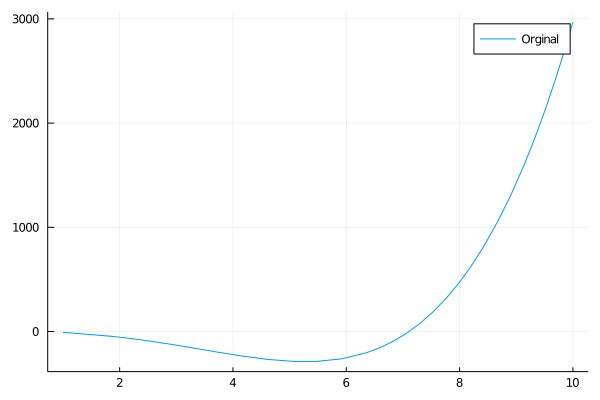

In [196]:
plot(f, 1, 10, label="Orginal")

In [148]:
interpolantfunc = LagrangeInterpolation(args,vals)

(::var"#Res#24"{Array{Float64,1},Array{Float64,1}}) (generic function with 1 method)

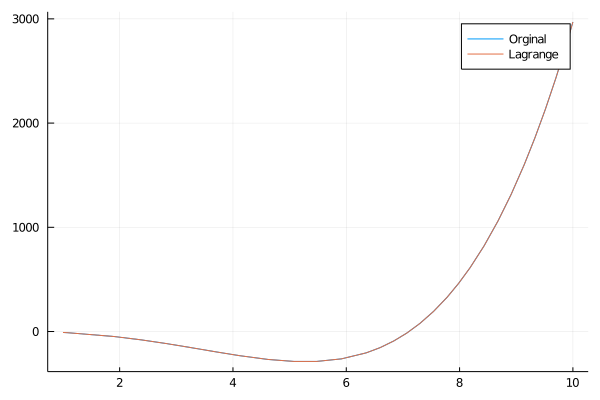

In [197]:
plot!(interpolantfunc, 1, 10, label="Lagrange")

### 2. Metoda Newtona

## A

In [150]:
function NewtonInterpolation(args, values)
    len = length(args)
    div = deepcopy(values)
    for i=2:len
        for j=1:i-1
            div[i] = (div[j] - div[i])/(args[j] - args[i])
        end
    end
    return div
end

NewtonInterpolation (generic function with 1 method)

In [151]:
args2 = [-5.0, -1.0, 0.0, 2.0]
values2 = [-2.0, 6.0, 1.0, 3.0]

4-element Array{Float64,1}:
 -2.0
  6.0
  1.0
  3.0

In [152]:
newt = NewtonInterpolation(args2, values2)

4-element Array{Float64,1}:
 -2.0
  2.0
 -1.4
  0.48571428571428565

## B

In [167]:
function NewtonPolynomial(args, div, point)
    len = length(div) 
    res = div[len] 
    for i=(len-1:-1:1)
        res = res * (point - args[i]) + div[i] 
    end
    return res
end

NewtonPolynomial (generic function with 1 method)

In [168]:
NewtonPolynomial(args2, newt, -3)

13.428571428571427

### Wykres

In [155]:
newt2 = NewtonInterpolation(args, vals)

10-element Array{Float64,1}:
   5.6128567730709396
 -16.901812435664016
 -13.08926254575182
   3.165982892615682
   0.9999999999999807
   1.2684301629368556e-14
  -8.374914473412934e-15
   3.765947166080772e-15
  -1.334438222906303e-15
   7.971279299907218e-16

In [165]:
newton_args = sort(rand(1000) * 10)

10-element Array{Float64,1}:
    5.6128567730709396
    1.1745304196317488
 -219.41119990803588
 -289.1298862354399
 -277.3980341598374
  -54.28113938875356
   78.86680980650476
  805.8856343489132
 1970.9760608230047
 2086.052030386197

In [174]:
NewtonPolynomial(args, newt2, 8.41)

801.6889826100005

In [175]:
newton_values = [NewtonPolynomial(args, newt2, x) for x in newton_args]

1000-element Array{Float64,1}:
    9.948313816042907
    9.91620749562994
    9.834369129166951
    9.718501900549652
    9.687710161366155
    9.590616273713618
    9.37635138510949
    8.76664847883686
    8.732554467313584
    8.690987555798664
    8.535133047382157
    8.393006100268906
    8.289319440522174
    ⋮
 2748.936347778334
 2756.0048507291212
 2792.9781180554905
 2796.630153219832
 2821.896067066057
 2823.831908301746
 2840.712898351182
 2850.149627320623
 2914.780923930749
 2937.8012141065988
 2938.816330477185
 2964.3063602211855

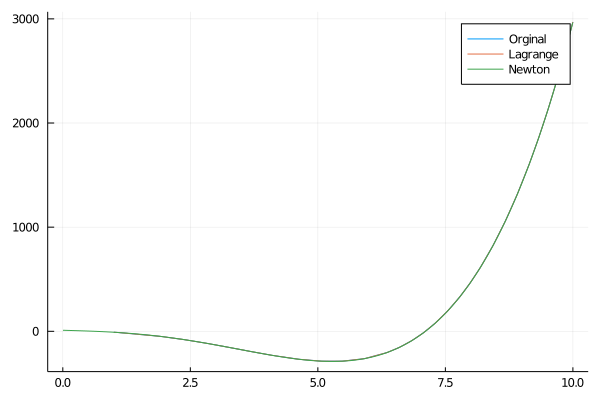

In [198]:
plot!(newton_args, newton_values, label="Newton")

### 3. Interpolacja wielomianowa dla pakietu Polynomials

In [189]:
import Pkg; 
Pkg.add("Polynomials")
using Polynomials
libfunc = fit(args, vals)

  Resolving package versions...
No Changes to `/opt/julia/environments/v1.5/Project.toml`
No Changes to `/opt/julia/environments/v1.5/Manifest.toml`


Polynomial(9.999999999912319 - 13.999999999464773*x + 0.9999999989771102*x^2 - 6.999999999227364*x^3 + 0.9999999996956651*x^4 + 7.021754741971108e-11*x^5 - 9.880032623080433e-12*x^6 + 8.365593598230164e-13*x^7 - 3.924041430936315e-14*x^8 + 7.84486752956075e-16*x^9)

In [53]:
plot!(libfunc, 0, 10, label="Library")

LoadError: [91mUndefVarError: plot! not defined[39m

#### Zauważamy że wszystkie interpolacje dobrz przybliżają oryginalną funkcje

### 4. Porownac metody poprzez pomiar czasu  wykonania  dla zmiennej ilosci wezlow interpolacji 

In [ ]:
f = 
len = 10
args = sort(rand(len) * 10)
vals = [f(arg) for arg in args]
# Lagrange
interpolantfunc = LagrangeInterpolation(args,vals)
# Newton
newt2 = NewtonInterpolation(args, vals)
newton_args = sort(rand(1000) * 10)
# Wyliczanie wartosci w punkcie dla Newtona
newton_values = [NewtonPolynomial(args, newt2, x) for x in newton_args]
# Library Polynomials
libfunc = fit(args, vals)
# Wyliczanie wartosci w punkcie dla Library
f(x)

In [222]:
f(x) = 0.1 * x^4 + 0.2 * x^3 - 2.6 * x^2 - x + 5
lagrange_times = Array{Float64}(undef, 10, 10)
newton_times = Array{Float64}(undef, 10, 10)
library_times = Array{Float64}(undef, 10, 10)
for _size in 1000:1000:10000
    for i = 1:10
        args = sort(rand(_size) * 10)
        vals = [f(arg) for arg in args]
        lagrange_times[i, convert(Int64, _size / 1000)] = @elapsed (LagrangeInterpolation(args,vals))
        newton_times[i, convert(Int64, _size / 1000)] =  @elapsed (NewtonInterpolation(args, vals))
        library_times[i, convert(Int64, _size / 1000)] =  @elapsed (fit(args, vals))
    end
end
lagrange_times

10×10 Array{Float64,2}:
 1.06e-5  7.0e-6  9.2e-6  9.3e-6   …  9.0e-6   9.2e-6   9.8e-6   1.02e-5
 8.5e-6   8.2e-6  8.6e-6  9.1e-6      9.0e-6   9.0e-6   1.02e-5  1.11e-5
 7.1e-6   8.1e-6  8.8e-6  9.2e-6      9.1e-6   9.6e-6   8.6e-6   1.2e-5
 7.0e-6   7.9e-6  9.1e-6  9.5e-6      9.9e-6   9.4e-6   9.5e-6   9.1e-6
 8.1e-6   7.1e-6  8.5e-6  1.09e-5     9.0e-6   9.6e-6   1.81e-5  9.6e-6
 7.3e-6   8.0e-6  8.7e-6  8.9e-6   …  7.6e-6   5.54e-5  9.6e-6   1.01e-5
 7.2e-6   9.4e-6  8.8e-6  9.2e-6      1.13e-5  9.4e-6   1.02e-5  1.07e-5
 6.9e-6   9.5e-6  9.4e-6  9.4e-6      9.6e-6   9.4e-6   9.9e-6   9.9e-6
 8.2e-6   9.1e-6  8.7e-6  9.8e-6      9.7e-6   9.5e-6   1.07e-5  1.28e-5
 7.0e-6   8.8e-6  8.6e-6  8.7e-6      9.7e-6   9.0e-6   9.6e-6   1.02e-5

In [223]:
lagrange_times[1, :]

10-element Array{Float64,1}:
 1.06e-5
 7.0e-6
 9.2e-6
 9.3e-6
 9.2e-6
 6.67e-5
 9.0e-6
 9.2e-6
 9.8e-6
 1.02e-5

In [224]:
### create one_dimensional arrays
_lagt = Float64[]
_newt = Float64[]
_libt = Float64[]
_sizes = Int64[]
for i = 1:10
    for j = 1:10
        push!(_lagt, lagrange_times[i, j])
        push!(_newt, newton_times[i, j])
        push!(_libt, library_times[i, j])
        push!(_sizes, j * 1000)
    end
end

In [225]:
using DataFrames
lag_frame = DataFrame(TYPE = ["Lagrange" for i in 1: 100], 
               SIZE = _sizes,
               TIME = _lagt
               ) 
new_frame = DataFrame(TYPE = ["Newton" for i in 1: 100], 
               SIZE = _sizes,
               TIME = _newt
               ) 
lib_frame = DataFrame(TYPE = ["Library" for i in 1: 100], 
               SIZE = _sizes,
               TIME = _libt
               ) 

,TYPE,SIZE,TIME
,String,Int64,Float64
1,Library,1000,0.0012031
2,Library,2000,0.005535
3,Library,3000,0.012008
4,Library,4000,0.0189546
5,Library,5000,0.029559
6,Library,6000,0.0427914
7,Library,7000,0.057582
8,Library,8000,0.074922
9,Library,9000,0.0982639


In [226]:
using Statistics
# Lagrange
lag_size_grouped = groupby(lag_frame, :SIZE)
lag_avrg = combine(lag_size_grouped, :TIME => mean => :mean_time)
lag_std = combine(lag_size_grouped, :TIME => std => :std_time)
# Newton
new_size_grouped = groupby(new_frame, :SIZE)
new_avrg = combine(new_size_grouped, :TIME => mean => :mean_time)
new_std = combine(new_size_grouped, :TIME => std => :std_time)
# Library
lib_size_grouped = groupby(lib_frame, :SIZE)
lib_avrg = combine(lib_size_grouped, :TIME => mean => :mean_time)
lib_std = combine(lib_size_grouped, :TIME => std => :std_time)

,SIZE,std_time
,Int64,Float64
1,1000,3.54965e-5
2,2000,0.00053761
3,3000,9.19593e-5
4,4000,0.000154166
5,5000,0.000794788
6,6000,0.000406747
7,7000,0.00119718
8,8000,0.012155
9,9000,0.0085098


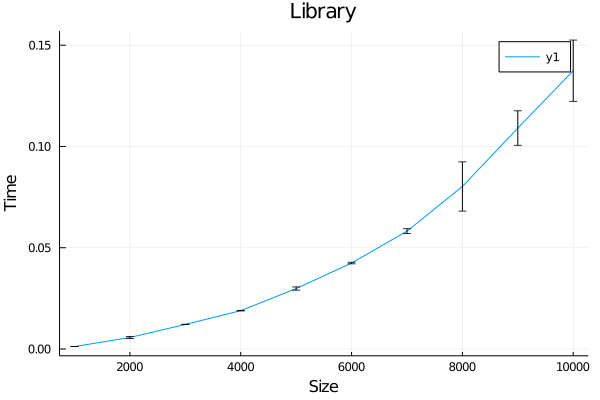

In [227]:
# Lagrange
lag_std_arr = convert(Array, lag_std.std_time)
plag = plot(lag_avrg.SIZE, lag_avrg.mean_time, yerr=lag_std_arr, xlabel = "Size", ylabel="Time",title = "Lagrange")
# Newton
new_std_arr = convert(Array, new_std.std_time)
pnew = plot(new_avrg.SIZE, new_avrg.mean_time, yerr=new_std_arr, xlabel = "Size", ylabel="Time",title = "Newton")
# Library
lib_std_arr = convert(Array, lib_std.std_time)
plib = plot(lib_avrg.SIZE, lib_avrg.mean_time, yerr=lib_std_arr, xlabel = "Size", ylabel="Time",title = "Library")


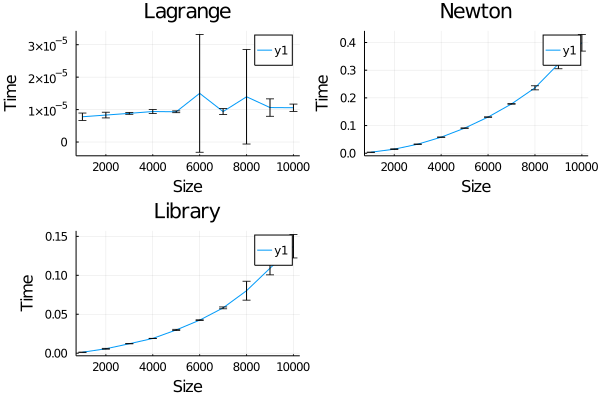

In [228]:
plot(plag, pnew, plib, layout=3)

### Czasy wyliczania wartosci w punkcie dla Newtona i Library

In [231]:
c_newton_times = Array{Float64}(undef, 10, 10)
c_library_times = Array{Float64}(undef, 10, 10)
for _size in 2000:2000:20000
    for i = 1:10
        args = sort(rand(_size) * 10)
        vals = [f(arg) for arg in args]
        c_new = NewtonInterpolation(args, vals)
        c_f = fit(args, vals)
        c_newton_times[i, convert(Int64, _size / 2000)] =  @elapsed (NewtonPolynomial(args, c_new, 5.55))
        c_library_times[i, convert(Int64, _size / 2000)] =  @elapsed (c_f(5.55))
    end
end

In [236]:
c_library_times[1, :]

10-element Array{Float64,1}:
 1.17e-5
 1.44e-5
 1.67e-5
 1.92e-5
 2.17e-5
 2.39e-5
 2.68e-5
 2.97e-5
 3.21e-5
 3.47e-5

In [238]:
c_newt = Float64[]
c_libt = Float64[]
_sizes = Int64[]
for i = 1:10
    for j = 1:10
        push!(c_newt, c_newton_times[i, j])
        push!(c_libt, c_library_times[i, j])
        push!(_sizes, j * 2000)
    end
end

In [240]:
c_new_frame = DataFrame(TYPE = ["Newton" for i in 1: 100], 
               SIZE = _sizes,
               TIME = c_newt
               ) 
c_lib_frame = DataFrame(TYPE = ["Library" for i in 1: 100], 
               SIZE = _sizes,
               TIME = c_libt
               ) 

,TYPE,SIZE,TIME
,String,Int64,Float64
1,Library,2000,1.17e-5
2,Library,4000,1.44e-5
3,Library,6000,1.67e-5
4,Library,8000,1.92e-5
5,Library,10000,2.17e-5
6,Library,12000,2.39e-5
7,Library,14000,2.68e-5
8,Library,16000,2.97e-5
9,Library,18000,3.21e-5


In [241]:
# Newton
c_new_size_grouped = groupby(c_new_frame, :SIZE)
c_new_avrg = combine(c_new_size_grouped, :TIME => mean => :mean_time)
c_new_std = combine(c_new_size_grouped, :TIME => std => :std_time)
# Library
c_lib_size_grouped = groupby(c_lib_frame, :SIZE)
c_lib_avrg = combine(c_lib_size_grouped, :TIME => mean => :mean_time)
c_lib_std = combine(c_lib_size_grouped, :TIME => std => :std_time)

,SIZE,std_time
,Int64,Float64
1,2000,8.25698e-7
2,4000,1.7127e-7
3,6000,2.28706e-5
4,8000,3.08804e-6
5,10000,2.89828e-7
6,12000,3.41402e-7
7,14000,2.72641e-7
8,16000,3.17805e-7
9,18000,1.29598e-6


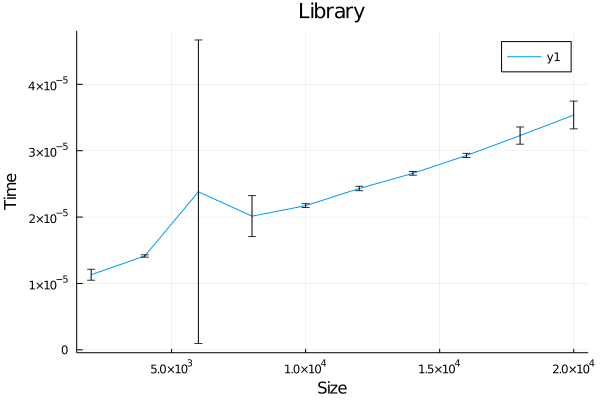

In [244]:
# Newton
c_new_std_arr = convert(Array, c_new_std.std_time)
c_pnew = plot(c_new_avrg.SIZE, c_new_avrg.mean_time, yerr=c_new_std_arr, xlabel = "Size", ylabel="Time",title = "Newton")
# Library
c_lib_std_arr = convert(Array, c_lib_std.std_time)
c_plib = plot(c_lib_avrg.SIZE, c_lib_avrg.mean_time, yerr=c_lib_std_arr, xlabel = "Size", ylabel="Time",title = "Library")

### Czasy wyliczania wartosci wielomianu

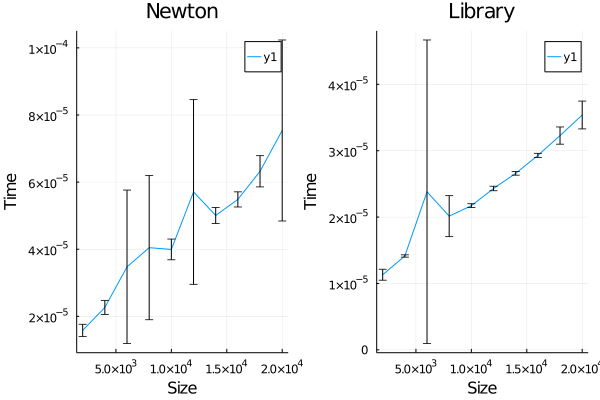

In [246]:
plot(c_pnew, c_plib, layout=2)

### 5. Algorytm Neville'a

In [54]:
function Neville(args, vals, x)
    len = length(args)
    p = vals
    diff = [0.0 for i=1:len]
    for i=1:len
        diff[i] = x - args[i]
    end
    for i=2:len
        for j=2:i
            p[i-j+1] = (diff[i] * p[i-j+1] - diff[i-j+1] * p[i-j+2]) / (args[i-j+1] - args[i])
        end
    end
    return p
end

Neville (generic function with 1 method)

In [55]:
using Polynomials
args = [0.0, 1.0, 2.0, 3.0]
values = [5.0, 2.0, -5.0, -10.0]
point = 2.5
p = neville(args, values, point)
libfunc = fit(args, values)
println(p)

[-8.125, -7.75, -7.5, -10.0]


In [56]:
p[1] == libfunc(point)

false

In [57]:
p[1]

-8.125

In [58]:
libfunc(point)

-8.2421875

In [59]:
point2 = 2
p2 = neville(args, values, point2)
libfunc(2)
p2[1] == libfunc(point2)

true